In [3]:
import warnings
warnings.filterwarnings("ignore")

## 결정 트리 학습과 시각화
- decision tree는 scaling같은 전처리가 거의 필요하지 않음.

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(136.72,187.033,'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(68.36,112.22,'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(205.08,112.22,'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(136.72,37.4067,'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(273.44,37.4067,'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

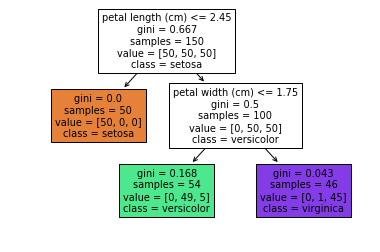

In [11]:
from sklearn import tree
tree.plot_tree(tree_clf, 
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               filled=True)

지니 불순도가 0에 가까울수록 노드는 순수하다.(클래스에 해당하는 샘플만 포함된다)

## 클래스 확률 추정

In [12]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
tree_clf.predict([[5, 1.5]])

array([1])

## CART 훈련 알고리즘
- scikit learn 에서는 이진트리만 생성하는 CART(classification and regression tree) 알고리즘을 사용한다.
- 불순도의 가중치 합으로 나타내진 비용함수가 가장 작은 서브셋으로 나눈다.

## 계산 복잡도
- 훈련 : 매 노드마다 모든 특성을 비교하므로 O(n* m * log2(m))
- 예측 : 루트에서 리프까지 탐색하며 각 노드는 하나의 특성만 확인하므로 O(log2(m))

## 지니 불순도와 엔트로피
- 결과적으로 지니 불순도와 엔트로피는 비슷한 트리를 만든다.
- 지니 불순도는 속도가 조금 더 빠른 편이고
- 다른 트리가 만들어지는 경우 엔트로피는 균형 잡힌 트리를 만드는 경향.

## 규제 매개변수
- 비파라미터 모델과 파라미터 모델
    + 비파라미터 모델 : decision tree처럼 훈련 전 파라미터 수가 결정되지 않은 모델
    + 파라미터 모델 : 선형모델처럼 미리 파라미터 수가 정해진 모델
    + 비파라미터 모델은 자유로운 만큼 데이터에 맞춰지기 때문에 과대적합될 가능성이 높다.
- decision tree의 regulation option
    + max_depth
    + min_samples_split
    + min_samples_leaf
    + min_weight_fraction_leaf
    + max_leaf_nodes
    + max_features
- pruning : 순도를 높이는 것이 통계적으로 큰 효과가 없을 때(카이제곱 검정을 통해) 노드를 제거

## 회귀
- mse를 최소화하도록 분할함

In [20]:
import numpy as np
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(170.9,187.033,'petal length (cm) <= 0.11\nmse = 0.107\nsamples = 200\nvalue = 0.387'),
 Text(85.45,112.22,'petal length (cm) <= 0.073\nmse = 0.026\nsamples = 31\nvalue = 0.793'),
 Text(42.725,37.4067,'mse = 0.014\nsamples = 18\nvalue = 0.888'),
 Text(128.175,37.4067,'mse = 0.013\nsamples = 13\nvalue = 0.661'),
 Text(256.35,112.22,'petal length (cm) <= 0.863\nmse = 0.086\nsamples = 169\nvalue = 0.313'),
 Text(213.625,37.4067,'mse = 0.038\nsamples = 137\nvalue = 0.204'),
 Text(299.075,37.4067,'mse = 0.025\nsamples = 32\nvalue = 0.777')]

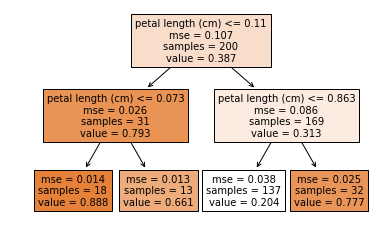

In [25]:
tree.plot_tree(tree_reg, 
               feature_names=iris.feature_names[2:],
               class_names = iris.target_names,
               filled=True,
                fontsize=10)

## 불안정성
- 단점1
    - decision tree는 결정 경계가 계단 모양이므로 축에 수직으로 분할한다.
    - 그래서 훈련 세트의 회전에 민감하다는 단점.
    - ex) 위아래로 분할하는 것은 쉽지만 대각선으로 분할하는 것은 구불구불한 계단모양을 만들어냄.
    - PCA가 해결 방법 중 하나.
- 단점2
    + 훈련 데이터의 변화에 민감하다.
    + 같은 데이터로 학습시켜도 다른 모델이 나올 수 있음.